<a href="https://colab.research.google.com/github/Kuisma1/stock-prediction/blob/main/Stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [75]:
#Load data
data = pd.read_csv("AMZN.csv")

In [76]:
# Scaler for normalization
scaler = MinMaxScaler(feature_range=(0,1))
# Strip unnecessary columns
data = data.Close
# Turn Series to numpy array
data = np.array(data.tolist())
data = data.reshape(-1,1)
# Normalize numpy array
data = scaler.fit_transform(data)

In [77]:
# Create training data
train_len = math.ceil(len(data)*0.8)

X_train = []
y_train = []

train = data[:train_len]

for i in range(60, train_len):
  X_train.append(train[i-60:i])
  y_train.append(train[i])
  
X_train = np.array(X_train).reshape(-1,60)
y_train = np.array(y_train).reshape(-1)

In [66]:
# Initialize the model
model = Sequential([
    Dense(units=32, activation="relu"),
    Dense(units=16, activation="relu"),
    Dense(units=1, activation="relu")
])
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100)

In [78]:
# Create testing data
X_test = []
y_test = []

test_len = len(data)-train_len

test = data[train_len:]

for i in range(60, test_len):
  X_test.append(test[i-60:i])
  y_test.append(test[i])

X_test = np.array(X_test).reshape(-1,60)
y_test = np.array(y_test).reshape(-1)

39/39 [==============================] - 0s 4ms/step


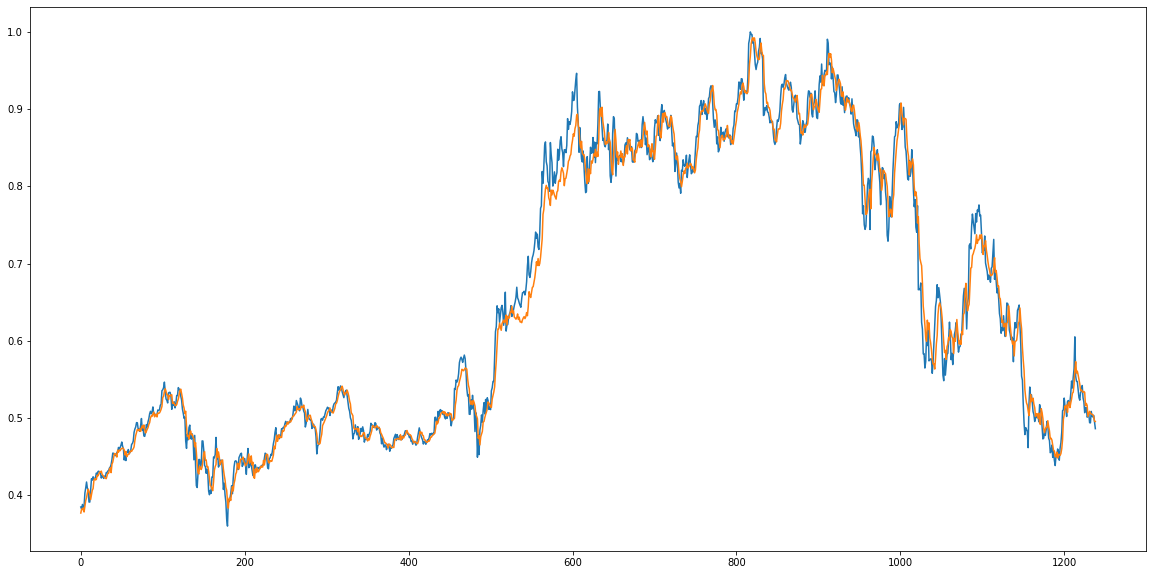

In [82]:
# Make predictions
y_pred = model.predict(X_test)
# Plot results
plt.figure(figsize=(20,10))
plt.plot(y_test)
plt.plot(y_pred)
plt.show()